# Zadanie 2
- Jakub Karbowski
- Jakub Szymczak

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

## Faktoryzacja LU

```haskell
lu [[a00]] = ([[1]], [[a00]])
lu ((a00:w):rows) = (l, u)
  where n = length w + 1
        v = map head rows
        ap = map tail rows
        (lp, up) = lu $ ap `msubm` (v `outer` w) `mdivs` a00
        l = (1 : replicate (n - 1) 0) : zipWith (:) (map (/a00) v) lp
        u = (a00 : w) : map (0:) up
```

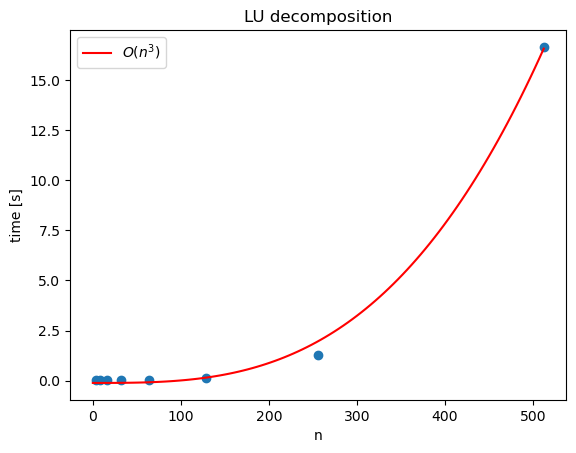

In [12]:
df = pd.read_csv('lu.txt.csv')

def f(x, a, b):
    return a * x**3 + b

x = df['n']
y = df['time']
popt, pcov = scipy.optimize.curve_fit(f, x, y)

plt.plot(x, y, 'o')

x = np.linspace(0, max(x), 100)
plt.plot(x, f(x, *popt), 'r-', label='$O(n^3)$')

plt.legend()
plt.title('LU decomposition')
plt.xlabel('n')
plt.ylabel('time [s]')
plt.show()

Zmierzona złożoność obliczeniowa $O(n^3)$ pokrywa się z teoretyczną.
Implementacja w Haskellu utrudnia pomiar czasu, ponieważ Haskell jest leniwy.
Aby "zmusić" go do obliczeń, liczymy sumę elementów macierzy wynikowych,
co wpływa lekko na czas ($+O(n^2)$ co asymptotycznie nie wpływa na $O(n^3)$).

## Wyznacznik

Dzięki obliczeniu faktoryzacji LU, obliczenie wyznacznika sprowadza się
do wymnożenia elementów na przekątnej macierzy U.

```haskell
det = product . diagonal . snd . lu
```

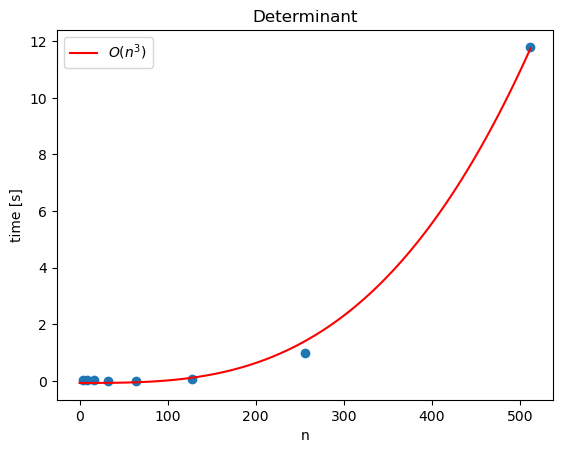

In [13]:
df = pd.read_csv('det.txt.csv')

def f(x, a, b):
    return a * x**3 + b

x = df['n']
y = df['time']
popt, pcov = scipy.optimize.curve_fit(f, x, y)

plt.plot(x, y, 'o')

x = np.linspace(0, max(x), 100)
plt.plot(x, f(x, *popt), 'r-', label='$O(n^3)$')

plt.legend()
plt.title('Determinant')
plt.xlabel('n')
plt.ylabel('time [s]')
plt.show()

Czas jest identyczny jak w przypadku faktoryzacji LU.

## Odwracanie macierzy